# Job Hunt Analysis

### Import Libraries

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from PIL import *

In [56]:
import nltk
from nltk import FreqDist
from wordcloud import WordCloud 
from nltk.corpus import RegexpTokenizer as regextoken
from nltk.corpus import stopwords

In [112]:
df=pd.read_csv("C:\\Users\\Owner\\Downloads\\College\\Practice\\Job_Progress.csv",encoding= 'unicode_escape')

In [113]:
df.shape

(26, 15)

### Skills

In [78]:
# Convert to string
df["Skills"] = df["Skills"].astype(str)
# Convert text to lower case
df["Skills"] = df["Skills"].apply(lambda x: x.lower())
# Creating a regular expression tokenizer that matches only alphabets
# This will return separate words (tokens) from the text
tokenizer = regextoken("[a-zA-Z]+")
# Apply the tokenizer to each row of the reviews
skills_tokens = df["Skills"] = df["Skills"].apply(tokenizer.tokenize)

In [79]:
# Import the English stopwords directory 
stop = stopwords.words("english")
stop.extend(["years", "nan","strong","knowledge","using","etc","skills","ability","environment"])

In [80]:
# Removing stopwords from the tokens
skills_tokens = skills_tokens.apply(lambda x: [token for token in x if token not in stop])
# Concatenating all the reviews 
all_skills = skills_tokens.astype(str).str.cat()
cleaned_skills = tokenizer.tokenize(all_skills)

In [81]:
# Get the frequency distribution of individual words in the skills
fd = FreqDist()
for word in cleaned_skills:
    fd[word] += 1
    
# Examining the top 5 most frequent words
fd.most_common(20)

[('experience', 29),
 ('data', 22),
 ('sql', 18),
 ('python', 12),
 ('development', 8),
 ('methodologies', 6),
 ('management', 6),
 ('javascript', 5),
 ('html', 5),
 ('css', 5),
 ('business', 5),
 ('programming', 5),
 ('web', 5),
 ('analysis', 5),
 ('technical', 4),
 ('communication', 4),
 ('service', 4),
 ('architecture', 4),
 ('java', 4),
 ('distributed', 4)]

In [82]:
# Extract only the words
skills_list = [item[0] for item in fd.most_common(20)]
text = str(skills_list)

### Word Cloud-Skills

In [90]:
bulb_mask = np.array(Image.open("C:/Users/Owner/Downloads/College/Practice/bulb.png"))

In [86]:
# function to swap number 0 to 255 for any image
def transform_any_image_format(val):
    if val.any() == 0:
        return 255
    elif val.any() == 1 :
        return 1
    elif val.any()!=0:
        return 255
    else:
        return val
    
# Transform your mask into a new one that will work with the function:
def new_mask(image_mask):
    transformed_mask = np.ndarray((image_mask.shape[0],image_mask.shape[1]), np.int32)

    for i in range(len(image_mask)):
        transformed_mask[i] = list(map(transform_any_image_format, image_mask[i]))
    
    return transformed_mask

In [91]:
transformed_bulb_mask=new_mask(bulb_mask)

In [104]:
# Create a word cloud image
wc = WordCloud(font_path='C:/Users/Owner/Downloads/College/Capstone Project/cabinsketch/CabinSketch-Bold.ttf',background_color="black", max_words=1000, 
               mask=transformed_bulb_mask, contour_width=3,width=1600,height=900,colormap=matplotlib.cm.inferno).generate(str(skills_list))

(-0.5, 1785.5, 2399.5, -0.5)

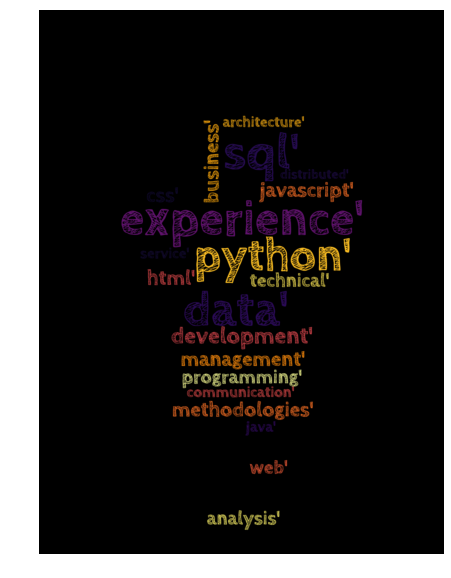

In [105]:
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [106]:
wc.to_file("C:\\Users\\Owner\\Downloads\\College\\Practice\\wordcloud_bulb.png")

### Location

In [108]:
df.columns

Index(['Company', 'Longitude', 'Latitude', 'Company Addresss', 'Position',
       'Website', 'Password Required', 'userId', 'Password', 'Status',
       'Cover Letter', 'Applied On', 'Job Type', 'Area', 'Skills'],
      dtype='object')

In [217]:
map_df=df[(df["Longitude"]<-90.0) &  (df["Latitude"]>49.0)]
BBox = (map_df.Longitude.min(),   map_df.Longitude.max(),map_df.Latitude.min(), map_df.Latitude.max())
print(" Longitude Minimum: ",map_df.Longitude.min(),"\n","Longitude Maximum: ",map_df.Longitude.max(),"\n",
      "Latitude Minimum: ",map_df.Latitude.min(),"\n", "Latitude Maximum: ",map_df.Latitude.max())

 Longitude Minimum:  -123.54678999999999 
 Longitude Maximum:  -122.97258000000001 
 Latitude Minimum:  49.19704 
 Latitude Maximum:  49.40617


In [220]:
van_m = plt.imread('C:/Users/Owner/Downloads/College/Practice/Job Hunt/map.png')

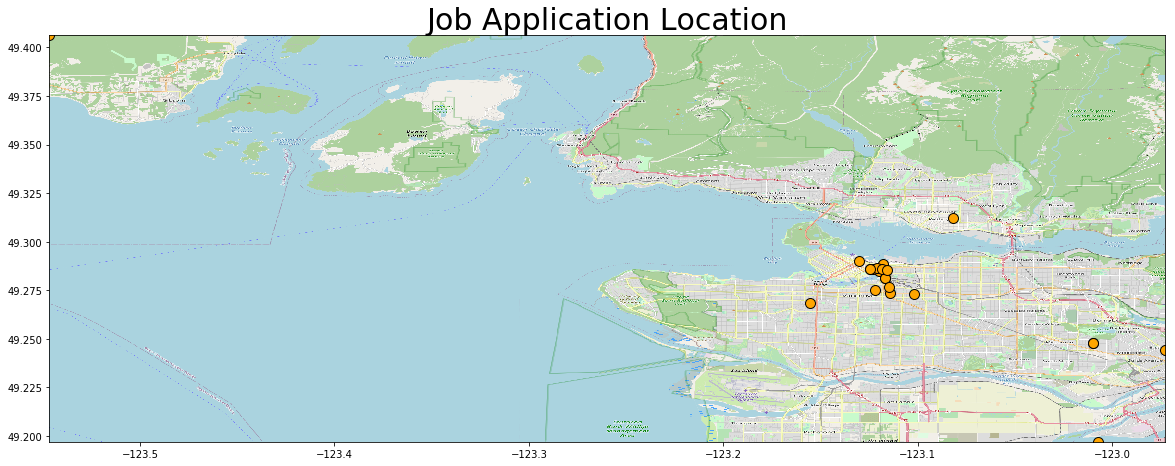

In [245]:
fig, ax = plt.subplots(figsize = (20,10))
plt.xlim(BBox[0],BBox[1])
plt.ylim(BBox[2],BBox[3])
plt.imshow(van_m,zorder=0, extent = BBox)
plt.plot(map_df.Longitude,map_df.Latitude,linestyle='none',marker='o', 
         markerfacecolor='orange', markersize=10, markeredgecolor="black")
plt.title("Job Application Location",fontsize=30)
plt.show()